<a href="https://colab.research.google.com/github/Dharshansk16/Deep-Learning-with-Pytorch/blob/main/rice_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [150]:
!pip install opendatasets --quiet
import opendatasets as od
od.download("https://www.kaggle.com/datasets/mssmartypants/rice-type-classification")

Skipping, found downloaded files in "./rice-type-classification" (use force=True to force download)


In [151]:
import torch
import torch.nn as nn #nueral network
from torch.optim import Adam
from torch.utils.data import Dataset, DataLoader
from torchsummary import summary
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)


cuda


In [152]:
df = pd.read_csv("/content/rice-type-classification/riceClassification.csv")
df.head(5)

,id,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
0,1,4537,92.229316,64.012769,0.719916,4677,76.004525,0.657536,273.085,0.764510,1.440796,1
1,2,2872,74.691881,51.400454,0.725553,3015,60.471018,0.713009,208.317,0.831658,1.453137,1
2,3,3048,76.293164,52.043491,0.731211,3132,62.296341,0.759153,210.012,0.868434,1.465950,1
3,4,3073,77.033628,51.928487,0.738639,3157,62.551300,0.783529,210.657,0.870203,1.483456,1
4,5,3693,85.124785,56.374021,0.749282,3802,68.571668,0.769375,230.332,0.874743,1.510000,1


In [153]:
#Basic Preprocessing
df.dropna(inplace=True) # remove null values
df.drop(['id'], axis=1, inplace=True) #id column is unnecessary

In [154]:
df.shape

(18185, 11)

In [155]:
print(df["Class"].unique())

[1 0]


In [156]:
df["Class"].value_counts()

,count
Class,
1,9985
0,8200


In [157]:
#Normalization #maxvalue of each column will be 1
#To achieve this we'll divide each column value by maxval of the column
original_df= df.copy()
for column in df.columns:
  df[column]/=df[column].abs().max()
df.head()



,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
0,0.444368,0.503404,0.775435,0.744658,0.424873,0.666610,0.741661,0.537029,0.844997,0.368316,1.0
1,0.281293,0.407681,0.622653,0.750489,0.273892,0.530370,0.804230,0.409661,0.919215,0.371471,1.0
2,0.298531,0.416421,0.630442,0.756341,0.284520,0.546380,0.856278,0.412994,0.959862,0.374747,1.0
3,0.300979,0.420463,0.629049,0.764024,0.286791,0.548616,0.883772,0.414262,0.961818,0.379222,1.0
4,0.361704,0.464626,0.682901,0.775033,0.345385,0.601418,0.867808,0.452954,0.966836,0.386007,1.0


In [158]:
##Splitting the datasets
X = np.array(df.iloc[:, :-1]) #Take all rows and columns of data except the last column
Y = np.array(df.iloc[:, -1]) # Take all rows of last column

In [159]:
X_train , X_test, y_train, y_test= train_test_split(X, Y ,test_size=0.3)

In [160]:
X_test , X_val, y_test, y_val= train_test_split(X_test, y_test ,test_size=0.5)

In [161]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(12729, 10)
(2728, 10)
(2728, 10)


In [162]:
class dataset(Dataset): #inheritance
  def __init__(self,X, Y):
    self.X=torch.tensor(X,dtype=torch.float32).to(device)
    self.Y=torch.tensor(Y, dtype=torch.float32).to(device)

  def __len__(self): #returns shape of input data
    return len(self.X)

  def __getitem__(self, idx):
    return self.X[idx], self.Y[idx]



In [163]:
##DataLoader
train_dataloader = DataLoader(training_data ,batch_size=32, shuffle=True) #batch_size specifies the number of rows of data in traversed at once (here multiples of 8)
validation_dataloader = DataLoader(validation_data ,batch_size=32, shuffle=True)
testing_dataloader = DataLoader(testing_data ,batch_size=32, shuffle=True)


In [164]:
##Creating objects
training_data  = dataset(X_train, y_train)
validation_data  = dataset(X_val, y_val)
testing_data = dataset(X_test, y_test)

In [165]:
for x,y in train_dataloader:
  print(x)
  print("--------")
  print(y)
  break

tensor([[0.6508, 0.8981, 0.6311, 0.9811, 0.6134, 0.8067, 0.5209, 0.7089, 0.7102,
         0.8074],
        [0.5593, 0.8430, 0.5765, 0.9840, 0.5299, 0.7478, 0.5145, 0.6634, 0.6969,
         0.8297],
        [0.7226, 0.9153, 0.6924, 0.9724, 0.6891, 0.8501, 0.5797, 0.7506, 0.7034,
         0.7499],
        [0.5224, 0.7632, 0.5984, 0.9677, 0.4989, 0.7228, 0.8657, 0.6222, 0.7401,
         0.7236],
        [0.5516, 0.8177, 0.5867, 0.9788, 0.5237, 0.7427, 0.5155, 0.6514, 0.7128,
         0.7907],
        [0.8657, 0.8796, 0.8612, 0.9283, 0.8257, 0.9304, 0.6487, 0.7480, 0.8486,
         0.5795],
        [0.6579, 0.7855, 0.7471, 0.9346, 0.6348, 0.8111, 0.7972, 0.6947, 0.7475,
         0.5965],
        [0.7171, 0.8280, 0.7535, 0.9434, 0.6781, 0.8468, 0.6142, 0.7009, 0.8007,
         0.6235],
        [0.7555, 0.8606, 0.7666, 0.9474, 0.7148, 0.8692, 0.8939, 0.7290, 0.7797,
         0.6369],
        [0.6118, 0.9164, 0.5873, 0.9903, 0.5875, 0.7821, 0.8008, 0.7244, 0.6394,
         0.8853],
        [0

In [166]:
## Build our own model
HIDDEN_NEURON=10
class MyModel(nn.Module):
  def __init__(self):
    super(MyModel, self).__init__()

    self.input_layer=nn.Linear(X.shape[1], HIDDEN_NEURON)
    self.hidden_layer=nn.Linear(HIDDEN_NEURON, 1)
    self.sigmoid = nn.Sigmoid()
  def forward(self,x):
    x=self.input_layer(x)
    x=self.hidden_layer(x)
    x=self.sigmoid(x)
    return x

In [167]:
model = MyModel().to(device)

In [168]:
##summary
summary(model, (X.shape[1],))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                   [-1, 10]             110
            Linear-2                    [-1, 1]              11
           Sigmoid-3                    [-1, 1]               0
Total params: 121
Trainable params: 121
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00
----------------------------------------------------------------


In [169]:
criterion = nn.BCELoss()
optimizer=Adam(model.parameters(), lr=1e-3)

In [170]:
total_loss_train_plot = []
total_loss_validation_plot=[]
total_acc_train_plot =[]
total_acc_validation_plot=[]

epochs=10
for epoch in range(epochs):
  total_acc_train=0
  total_loss_train=0
  total_acc_val=0
  total_loss_val=0

  for data in train_dataloader:
    inputs,labels=data
    prediction=model(inputs).squeeze(1)
    batch_loss = criterion(prediction, labels)
    total_loss_train += batch_loss.item()
    acc=((prediction).round()==labels).sum().item() #number of true values out the given values
    total_acc_train +=acc

    batch_loss.backward()
    optimizer.step()
    optimizer.zero_grad()

  with torch.no_grad():
    for data in validation_dataloader:
      inputs , labels =data
      prediction = model(inputs).squeeze(1)
      batch_loss = criterion(prediction, labels)
      total_loss_val += batch_loss.item()
      acc = ((prediction).round()==labels).sum().item()
      total_acc_val +=acc

  total_loss_train_plot.append(round(total_loss_train/1000,4))
  total_loss_validation_plot.append(round(total_loss_val/1000,4))

  total_acc_train_plot.append(round(total_acc_train/training_data.__len__()*100,4))
  total_acc_validation_plot.append(round(total_acc_val/validation_data.__len__()*100,4))

  print(f'''Epoch no. {epoch+1} Train Loss: {round(total_loss_train/1000,4)} Train Accuracy: {round(total_acc_train/training_data.__len__()*100,4)}
        validation Loss: {round(total_loss_val/1000,4)} Validation Accuracy : {round(total_acc_val/validation_data.__len__()*100,4)}''')
  print("="*25)


Epoch no. 1 Train Loss: 0.2371 Train Accuracy: 80.9333
        validation Loss: 0.0397 Validation Accuracy : 96.5176
Epoch no. 2 Train Loss: 0.129 Train Accuracy: 97.541
        validation Loss: 0.0189 Validation Accuracy : 97.9472
Epoch no. 3 Train Loss: 0.065 Train Accuracy: 98.1617
        validation Loss: 0.0108 Validation Accuracy : 97.9839
Epoch no. 4 Train Loss: 0.0414 Train Accuracy: 98.3974
        validation Loss: 0.0078 Validation Accuracy : 98.0205
Epoch no. 5 Train Loss: 0.0312 Train Accuracy: 98.4681
        validation Loss: 0.0062 Validation Accuracy : 98.717
Epoch no. 6 Train Loss: 0.0259 Train Accuracy: 98.5152
        validation Loss: 0.0054 Validation Accuracy : 98.4238
Epoch no. 7 Train Loss: 0.023 Train Accuracy: 98.5388
        validation Loss: 0.0046 Validation Accuracy : 98.5704
Epoch no. 8 Train Loss: 0.021 Train Accuracy: 98.6095
        validation Loss: 0.0043 Validation Accuracy : 98.6437
Epoch no. 9 Train Loss: 0.0198 Train Accuracy: 98.6016
        validat

In [171]:
with torch.no_grad():
  total_loss_test=0
  total_acc_test=0
  for data in testing_dataloader:
    inputs , labels = data
    prediction = model(inputs).squeeze(1)
    batch_loss_test= criterion(prediction, labels).item()
    total_loss_test += batch_loss_test
    acc_test = ((prediction).round()==labels).sum().item()
    total_acc_test +=acc_test

  print("Accuracy: " ,round(total_acc_test/testing_data.__len__()*100, 4))



Accuracy:  98.8636


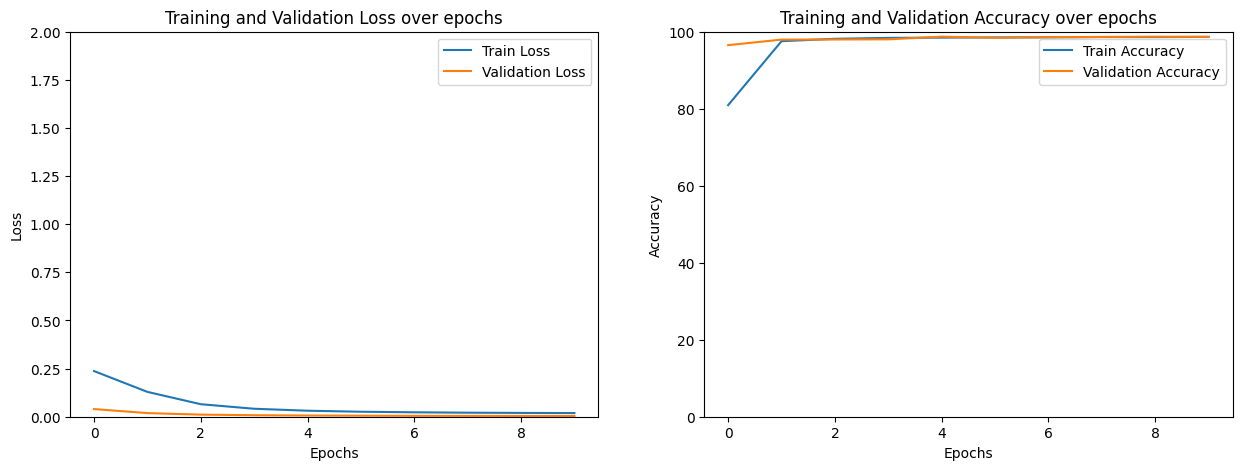

In [172]:
fig , axis = plt.subplots(nrows=1,ncols=2, figsize=(15,5))
axis[0].plot(total_loss_train_plot, label="Train Loss")
axis[0].plot(total_loss_validation_plot, label="Validation Loss")
axis[0].set_title("Training and Validation Loss over epochs")
axis[0].set_xlabel("Epochs")
axis[0].set_ylabel("Loss")
axis[0].set_ylim(0,2)
axis[0].legend()


axis[1].plot(total_acc_train_plot, label="Train Accuracy")
axis[1].plot(total_acc_validation_plot, label="Validation Accuracy")
axis[1].set_title("Training and Validation Accuracy over epochs")
axis[1].set_xlabel("Epochs")
axis[1].set_ylabel("Accuracy")
axis[1].set_ylim(0,100)
axis[1].legend()


plt.show()

In [173]:
original_df.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
0,4537,92.229316,64.012769,0.719916,4677,76.004525,0.657536,273.085,0.764510,1.440796,1
1,2872,74.691881,51.400454,0.725553,3015,60.471018,0.713009,208.317,0.831658,1.453137,1
2,3048,76.293164,52.043491,0.731211,3132,62.296341,0.759153,210.012,0.868434,1.465950,1
3,3073,77.033628,51.928487,0.738639,3157,62.551300,0.783529,210.657,0.870203,1.483456,1
4,3693,85.124785,56.374021,0.749282,3802,68.571668,0.769375,230.332,0.874743,1.510000,1


In [174]:
area =2543/original_df["Area"].max()
major_axis_length =80/original_df["MajorAxisLength"].max()
minor_axis_length =50/original_df["MinorAxisLength"].max()
eccentricity = 0.72/original_df["Eccentricity"].max()
convex_area=3500/original_df["ConvexArea"].max()
equiv_diameter=65/original_df["EquivDiameter"].max()
extent =2543/original_df["Extent"].max()
perimeter =205/original_df["Perimeter"].max()
roundness =0.85/original_df["Roundness"].max()
aspect_ration=1.4/original_df["AspectRation"].max()

In [177]:
model(torch.tensor([area, major_axis_length, minor_axis_length, eccentricity, convex_area, equiv_diameter, extent, perimeter, roundness, aspect_ration], dtype=torch.float32).to(device)).item()

0.0

1.7344149706955493e-16